This file uses CNN and the full dataset. 

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class CNN(nn.Module):
  def __init__(self) -> None:
    super().__init__()
    self.features = nn.Sequential(
            nn.Conv2d(1,16,kernel_size = 5),
            nn.ReLU(),
            nn.Conv2d(16,8,kernel_size = 5),
            nn.ReLU()
        )
    self.classifier = nn.Sequential(
            nn.Linear(1408, 16),
            nn.ReLU(),
            nn.Linear(16,1)
        )


  def forward(self, x: torch.Tensor) -> torch.Tensor:
    x = self.features(x)
    x = torch.flatten(x, 1)
    x = self.classifier(x)
    return F.sigmoid(x)

# New Section

In [ ]:
loss = nn.CrossEntropyLoss()

In [ ]:
device = torch.device('cuda')
model = CNN()
model = model.to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import torch
X = pd.read_csv("New_X.csv")
Y = pd.read_csv("New_Y.csv")
b = np.where(np.isnan(X), 0, X)
b1 = np.where(np.isnan(Y), 0, Y)
X_train = torch.from_numpy(b).float()
Y_train = torch.from_numpy(b1).float()

In [ ]:
print(X_train.shape)
print(Y_train.shape)

torch.Size([7774, 480])
torch.Size([7774, 1])


In [ ]:
X_train = torch.reshape(X_train, (7774, 30, 16))

In [ ]:
class PathMNISTDataset(torch.utils.data.Dataset):
  'Characterizes a dataset for PyTorch'
  def __init__(self, X, Y):
    self.X = X
    self.Y = Y

  def __len__(self):
    return len(self.X)

  def __getitem__(self, index):
    return self.X[index][None],self.Y[index]

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test, Y_train1, Y_test = train_test_split(X_train, Y_train)
X_train1 = X_train1[:5800,:,:]
Y_train1 = Y_train1[:5800,:]
#X_test = X_test[:1984,:]
#Y_test = Y_test[:1984,:]
train_dataset = PathMNISTDataset(X_train1, Y_train1)
test_dataset = PathMNISTDataset(X_test, Y_test)

In [ ]:
print(X_train1.shape)

torch.Size([5800, 30, 16])


In [ ]:
print(X_test.shape)

torch.Size([1944, 30, 16])


In [ ]:
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=1)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=64,shuffle=True, num_workers=1)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
criterion = torch.nn.BCELoss()
best_model_wts = copy.deepcopy(model.state_dict())
best_acc = 0.0
t_loss = []
for epoch in range(100):

  running_loss = 0.0
  best_loss = 0.0
  running_corrects = 0.0
  model.train()

  for batch_idx, (data, labels) in enumerate(train_dataloader):
    data = data.to(device)
    labels = labels.to(device)
    optimizer.zero_grad()
    outputs = model(data)
    loss = criterion(outputs, labels.float())
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    #print (((outputs >= 0.5) == labels.data).shape)
    running_corrects += torch.sum((outputs >= 0.5) == labels.data)

  epoch_loss = running_loss / len(train_dataset)
  epoch_acc = running_corrects.double() / len(train_dataset)
  print('Loss: {:.4f}, Accurate: {:4f}'.format(epoch_loss, epoch_acc))
  t_loss.append(epoch_loss)

  # deep copy the model
  if epoch_acc > best_acc:
      best_acc = epoch_acc
      best_model_wts = copy.deepcopy(model.state_dict())

model.load_state_dict(best_model_wts)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Loss: 0.0110, Accurate: 0.506552
Loss: 0.0109, Accurate: 0.526207
Loss: 0.0108, Accurate: 0.534655
Loss: 0.0107, Accurate: 0.553621
Loss: 0.0107, Accurate: 0.563276
Loss: 0.0106, Accurate: 0.577414
Loss: 0.0106, Accurate: 0.581034
Loss: 0.0105, Accurate: 0.593793
Loss: 0.0105, Accurate: 0.596379
Loss: 0.0104, Accurate: 0.610000
Loss: 0.0103, Accurate: 0.614655
Loss: 0.0102, Accurate: 0.630000
Loss: 0.0101, Accurate: 0.629310
Loss: 0.0100, Accurate: 0.645690
Loss: 0.0099, Accurate: 0.644828
Loss: 0.0098, Accurate: 0.653793
Loss: 0.0096, Accurate: 0.662931
Loss: 0.0096, Accurate: 0.668448
Loss: 0.0094, Accurate: 0.681897
Loss: 0.0092, Accurate: 0.692069
Loss: 0.0091, Accurate: 0.697759
Loss: 0.0089, Accurate: 0.715345
Loss: 0.0087, Accurate: 0.722931
Loss: 0.0086, Accurate: 0.726379
Loss: 0.0083, Accurate: 0.742069
Loss: 0.0082, Accurate: 0.741724
Loss: 0.0080, Accurate: 0.753103
Loss: 0.0077, Accurate: 0.770000
Loss: 0.0075, Accurate: 0.774310
Loss: 0.0074, Accurate: 0.779483
Loss: 0.00

KeyboardInterrupt: ignored

In [ ]:
def check_accuracy(test_loader, model):
  num_correct = 0
  total = 0
  model.eval()
  with torch.no_grad():
    for batch_idx, (data, labels) in enumerate(test_loader):
      data = data.to(device)
      labels = labels.to(device)
      predictions = model(data)
      num_correct += ((predictions>=0.5) == labels).sum()
      total += len(labels)
    print(float(num_correct)/float(total))

In [ ]:
check_accuracy(test_dataloader, model)

0.48045267489711935


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


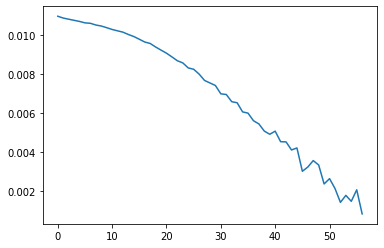

In [ ]:
plt.plot(t_loss)